In [2]:
import requests
import csv

url = 'https://huggingface.co/datasets/mstz/heart_failure/raw/main/heart_failure_clinical_records_dataset.csv'

def descargar_datos(url):
  respuesta = requests.get(url)
  nombre_archivo = url.split("/")[-1]
  with open(nombre_archivo, "w") as archivo:
    escritor = csv.writer(archivo)
    contenido = respuesta.content.decode("utf-8")
    lista = contenido.splitlines()
    for linea in lista:
      escritor.writerow(linea.split(","))
  return nombre_archivo


In [16]:
import sys 
  
sys.argv.append("https://huggingface.co/datasets/mstz/heart_failure/raw/main/heart_failure_clinical_records_dataset.csv")
  
print("This is the name of the program:", 
       sys.argv[0]) 
print("Number of elements including the name of the program:", 
       len(sys.argv)) 
print("Number of elements excluding the name of the program:", 
      (len(sys.argv)-1)) 
print("Argument List:", 
       str(sys.argv)) 


This is the name of the program: C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py
Number of elements including the name of the program: 12
Number of elements excluding the name of the program: 11
Argument List: ['C:\\Users\\danie\\AppData\\Roaming\\Python\\Python311\\site-packages\\ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9011', '--control=9009', '--hb=9008', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"ae9d3285-46db-4349-8dfe-e6a634f6867a"', '--shell=9010', '--transport="tcp"', '--iopub=9012', '--f=c:\\Users\\danie\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-150806i3MMurjUUFP.json', 'https://huggingface.co/datasets/mstz/heart_failure/raw/main/heart_failure_clinical_records_dataset.csv']


In [18]:
import requests
import csv

url = 'https://huggingface.co/datasets/mstz/heart_failure/raw/main/heart_failure_clinical_records_dataset.csv'

def descargar_datos(url):
  respuesta = requests.get(url)
  nombre_archivo = url.split("/")[-1]
  with open(nombre_archivo, "w") as archivo:
    escritor = csv.writer(archivo)
    contenido = respuesta.content.decode("utf-8")
    lista = contenido.splitlines()
    for linea in lista:
      escritor.writerow(linea.split(","))
  return nombre_archivo

descargar_datos(url)

'heart_failure_clinical_records_dataset.csv'

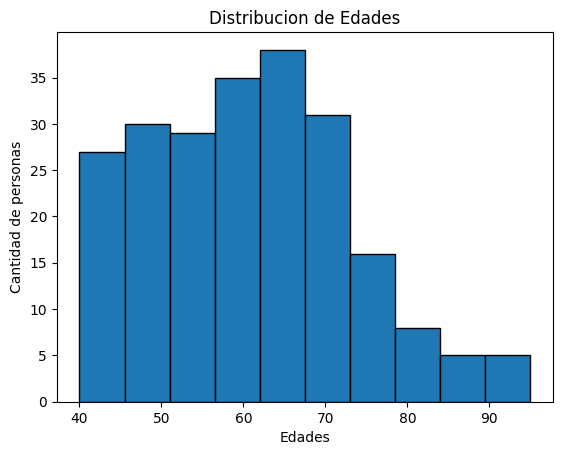

In [23]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('heart_failure_clear.csv')

Edades = df['age']
# aunque al calcular el bins con la raiz cuadrada de la materia nos da 9 con 10 nos da la grafica solicitada
plt.hist(Edades, bins=10,edgecolor='black')
plt.title('Distribucion de Edades')
plt.xlabel('Edades')
plt.ylabel('Cantidad de personas')

plt.show()

sex
0    43
1    62
Name: anaemia, dtype: int64
sex
0    41
1    53
Name: diabetes, dtype: int64
sex
0     2
1    70
Name: smoking, dtype: int64
sex
0    20
1    41
Name: DEATH_EVENT, dtype: int64


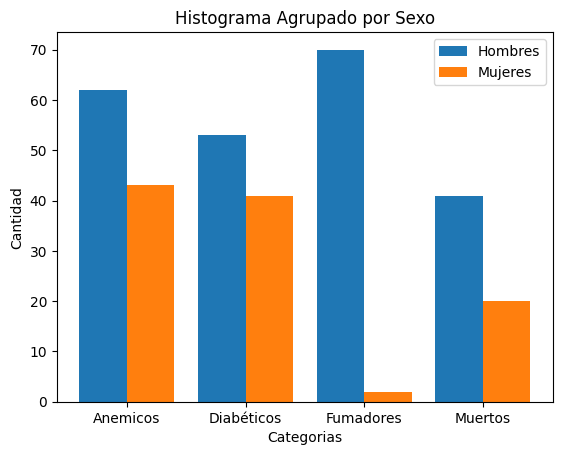

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('heart_failure_clear.csv')

# Definir los datos de los hombre y mujeres que son anemmicos, diabeticos, fumadores y muertos
df_anaemia = df.groupby("sex")["anaemia"].sum()
df_diabetes = df.groupby("sex")["diabetes"].sum()
df_smoking = df.groupby("sex")["smoking"].sum()
df_dead = df.groupby("sex")["DEATH_EVENT"].sum()

print(df_anaemia)
print(df_diabetes)
print(df_smoking)
print(df_dead)
df_total_hom= [df_anaemia[1],df_diabetes[1],df_smoking[1], df_dead[1]]
df_total_muje = [df_anaemia[0],df_diabetes[0],df_smoking[0], df_dead[0]]
# # Definir las etiquetas del eje x
etiquetas = ["Anemicos", "Diabéticos", "Fumadores", "Muertos"]

# # Definir el ancho de las barras
ancho = 0.4

# # Crear el gráfico de barras
plt.bar(etiquetas, df_total_hom, width=-ancho, align='edge', label='Hombres')
plt.bar(etiquetas, df_total_muje,width=ancho, align='edge', label='Mujeres')


# # Añadir la leyenda
plt.legend()
plt.title('Histograma Agrupado por Sexo')
plt.xlabel('Categorias')
plt.ylabel('Cantidad')

# # Mostrar el gráfico
plt.show()


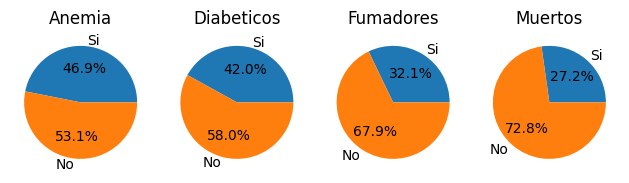

In [169]:
import matplotlib.pyplot as plt


df_anaemia = df.groupby('anaemia').size()
df_diabetes = df.groupby("diabetes").size()
df_smoking = df.groupby("smoking").size()
df_dead = df.groupby("DEATH_EVENT").size()


# Creamos una figura con una cuadrícula de 2x2
plt.subplot(1, 4, 1)
categorias_1 = ['Si', 'No']
valores_1 = [df_anaemia[1],df_anaemia[0]]
plt.pie(valores_1, labels=categorias_1,autopct="%.1f%%")
plt.title("Anemia")

plt.subplot(1, 4, 2)
categorias_2 = ['Si', 'No']
valores_2 = [df_diabetes[1],df_diabetes[0]]
plt.pie(valores_2, labels=categorias_2,autopct="%.1f%%")
plt.title("Diabeticos")

plt.subplot(1, 4, 3)
categorias_3 = ['Si', 'No']
valores_3 = [df_smoking[1],df_smoking[0]]
plt.pie(valores_3, labels=categorias_3,autopct="%.1f%%")
plt.title("Fumadores")

plt.subplot(1, 4, 4)
categorias_4 = ['Si', 'No']
valores_4 = [df_dead[1],df_dead[0]]
plt.pie(valores_4, labels=categorias_4,autopct="%.1f%%")
plt.title("Muertos")

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()


In [137]:
import pandas as pd

import numpy as np

from datasets import load_dataset

dataset = load_dataset("mstz/heart_failure")

data = dataset["train"]

edad = data["age"]

promedio_edad = np.mean(edad)

df = pd.DataFrame(data)

df_dead = df[df["is_dead"] == 1]
df_alive = df[df["is_dead"] == 0]

mean_age_dead = df_dead["age"].mean()
mean_age_alive = df_alive["age"].mean()

#  imprimimos el tipo de dato de cada columna y evaluamos si el tipo de dato de este esta correcto y podemos operar con el.
# print(df.dtypes)


df_mujer = sum(df['is_male']==1)
print(df_hombre)
print(df_mujer)
df_smokers_1 = df.groupby("is_male")["is_smoker"].sum()
df_smokers = df.groupby(['is_male','is_smoker']).size()
print(df_smokers)
print(df_smokers_1)




105
194
is_male  is_smoker
False    False        101
         True           4
True     False        102
         True          92
dtype: int64
is_male
False     4
True     92
Name: is_smoker, dtype: int64


In [1]:
import pandas as pd

import numpy as np

from datasets import load_dataset

dataset = load_dataset("mstz/heart_failure")

data = dataset["train"]

edad = data["age"]

promedio_edad = np.mean(edad)

df = pd.DataFrame(data)

df_dead = df[df["is_dead"] == 1]
df_live = df[df["is_dead"] == 0]

mean_age_dead = df_dead["age"].mean()
mean_age_alive = df_live["age"].mean()

print(f"El promedio de edad de las personas que muerieron es {mean_age_dead:.2f} años.")
print(f"El promedio de edad de las personas que sobrevivieron es {mean_age_alive:.2f} años.")


print(df.dtypes)

df_smokers = df.groupby("is_male")["is_smoker"].sum()
print(df_smokers)

El promedio de edad de las personas que muerieron es 65.21 años.
El promedio de edad de las personas que sobrevivieron es 58.76 años.
age                                                  int64
has_anaemia                                           bool
creatinine_phosphokinase_concentration_in_blood    float64
has_diabetes                                          bool
heart_ejection_fraction                            float64
has_high_blood_pressure                               bool
platelets_concentration_in_blood                   float64
serum_creatinine_concentration_in_blood            float64
serum_sodium_concentration_in_blood                float64
is_male                                               bool
is_smoker                                             bool
days_in_study                                        int64
is_dead                                              int64
dtype: object
is_male
False     4
True     92
Name: is_smoker, dtype: int64


In [174]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

df = pd.read_csv('heart_failure_clear.csv')

X = df.drop(columns=["DEATH_EVENT", "age_group"]).values
y = df["DEATH_EVENT"].values

X_embedded = TSNE(
    n_components=3,
    learning_rate='auto',
    init='random',
    perplexity=3
).fit_transform(X)

fig = px.scatter_3d(
    x=X_embedded[:, 0],
    y=X_embedded[:, 1],
    z=X_embedded[:, 2],
    color=y,
    labels={
        "x": "Componente 1",
        "y": "Componente 2",
        "z": "Componente 3",
        "color": "DEATH_EVENT"
    }
)
   
# Mostrar la gráfica
fig.show()



In [18]:
import requests
import csv

url = 'https://huggingface.co/datasets/mstz/heart_failure/raw/main/heart_failure_clinical_records_dataset.csv'

# def descargar_datos(url):
  # Hacer una solicitud GET al servidor
respuesta = requests.get(url)
  # Obtener el nombre del archivo a partir de la url
nombre_archivo = url.split("/")[-1]
  # Abrir un archivo csv en modo escritura
with open(nombre_archivo, "w") as archivo:
    # Crear un objeto writer para escribir los datos
  escritor = csv.writer(archivo)
    # Decodificar el contenido de la respuesta como texto
  contenido = respuesta.content.decode("utf-8")
    # Dividir el contenido por líneas y convertirlo en una lista
  lista = contenido.splitlines()
    # Escribir cada línea en el archivo csv
  for linea in lista:
    escritor.writerow(linea.split(","))
  # Devolver el nombre del archivo csv creado
  

print(nombre_archivo)
print(archivo)
print(escritor)
print(contenido)
print(lista)


heart_failure_clinical_records_dataset.csv
<_io.TextIOWrapper name='heart_failure_clinical_records_dataset.csv' mode='w' encoding='cp1252'>
age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1
75,1,246,0,15,0,127000,1.2,137,1,0,10,1
60,1,315,1,60,0,454000,1.1,131,1,1,10,1
65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
80,1,123,0,35,1,388000,9.4,133,1,1,10,1
75,1,81,0,38,1,368000,4,131,1,1,10,1
62,0,231,0,25,1,253000,0.9,140,1,1,10,1
45,1,981,0,30,0,136000,1.1,137,1,0,11,1
50,1,168,0,38,1,276000,1.1,137,1,0,11,1
49,1,80,0,30,1,427000,1,138,0,0,12,0
82,1,379,0,50,0,47000,1.3,136,1,0,13,1
87,1,149,0,38,0,262000,0.9,140,1,0,14,1
45,0,582,0,14,0,166000,0.8,127,1,0

In [3]:
import pandas as pd

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

def limp(df : pd.DataFrame) -> pd.DataFrame:
    def reemp(df: pd.DataFrame) -> pd.DataFrame:
        pass
    pass

print(df.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [46]:

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# print(df.isna().any())
# print((df.isna().any()).index)
# k= df.isna().any()
# columns=k.index
# h= columns[k]
# print(df.isna().sum())
for n in (df.isna().any()):
    if n == True :
        k= df.isna().any()
        columns=k.index
        h= columns[k]
        mean_age = df[h].mean()
        df[h] = df[h].fillna(mean_age)          
# print(df.isna().sum())

def iqr_c(Colum : pd.DataFrame) -> None:
        Q1 = Colum.quantile(0.25)
        Q3 = Colum.quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df[(Colum >= lower_bound) & (Colum <= upper_bound)]
        return df_cleaned
for n in (df.isna()):
    df = iqr_c(df[n])


    

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64
0      0
1      0
2      0
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: anaemia, Length: 299, dtype: int64
0       582
1      7861
2       146
3       111
4       160
       ... 
294      61
295    1820
296    2060
297    2413
298     196
Name: creatinine_phosphokinase, Length: 299, dtype: int64
0      0
1      0
2      0
3      0
4      1
      ..
294    1
295    0
296    1
297    0
298    0
Name: diabetes, Length: 299, dtype: int64
0      20.0
1      38.0
2      20.0
3      20.0
4      20.0
       ... 
294    38.0
295    38.0
296    60.0
297    38.0
298    45.0
Name: ejection_fraction, Length: 299, dtype: float64
0      1
1      0
2      0
3      0
4      0
      ..
294    1
295    0
296    0
297    0
298    0
Name: high_blood_pressure, Length: 299, dtype: int64
0      265000.00
1   

In [57]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
def limp(df : pd.DataFrame) -> pd.DataFrame:
    # vamos a buscar duplicados en dataFrame
    dup = df.duplicated().sum()
    if dup < 0 :
        df = df.drop_duplicates()
    # buscamos columna por columna si hay valores faltantes
    for n in (df.isna().any()):
            # si hay valores falantes solo seleccionamos las columnas que les faltan valores
            # y agremos en esos espacion la media de la columna ya que solo estamos trabajando con valores 
            # numericos
        if n == True :
            k= df.isna().any()
            columns=k.index
            h= columns[k]
            mean_age = df[h].mean()
            df[h] = df[h].fillna(mean_age)
    def iqr_c(Colum : pd.DataFrame) -> None:
        Q1 = Colum.quantile(0.25)
        Q3 = Colum.quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df[(Colum >= lower_bound) & (Colum <= upper_bound)]
        return df_cleaned   
    for n in (df.isna()):
        df = iqr_c(df[n])
    def categorize_age(x): 
        if x <= 12: return 'Niño'
        elif x <= 19: return 'Adolescente' 
        elif x <= 39: return 'Joven adulto'
        elif x <= 59: return 'Adulto'
        else: return 'Adulto mayor';
    df['age_group'] = df['age'].apply(categorize_age)
    df.to_csv("heart_failure_clear.csv", index=False)
    return df
limp(df)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20.0,1,265000.0,1.9,130,1,0,4,1,Adulto mayor
2,65.0,0,146,0,20.0,0,162000.0,1.3,129,1,1,7,1,Adulto mayor
3,50.0,1,111,0,20.0,0,210000.0,1.9,137,1,0,7,1,Adulto
5,90.0,1,47,0,40.0,1,204000.0,2.1,132,1,1,8,1,Adulto mayor
6,75.0,1,246,0,15.0,0,127000.0,1.2,137,1,0,10,1,Adulto mayor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35.0,0,133000.0,1.4,139,1,0,258,0,Adulto mayor
292,52.0,0,190,1,38.0,0,382000.0,1.0,140,1,1,258,0,Adulto
293,63.0,1,103,1,35.0,0,179000.0,0.9,136,1,1,270,0,Adulto mayor
294,62.0,0,61,1,38.0,1,155000.0,1.1,143,1,1,270,0,Adulto mayor


In [62]:
import pandas as pd 
import requests 
import sys

print("This is the name of the program:", sys.argv[0]) 
  
print("Argument List:", str(sys.argv)) 

This is the name of the program: C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py
Argument List: ['C:\\Users\\danie\\AppData\\Roaming\\Python\\Python311\\site-packages\\ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9011', '--control=9009', '--hb=9008', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"bdbdb7df-7f74-4ff5-a1de-ed87ff2fe4f5"', '--shell=9010', '--transport="tcp"', '--iopub=9012', '--f=c:\\Users\\danie\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-5680gFRyyCz9342X.json']
